In [1]:
### Import The Libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [3]:
#### Import the dataset
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
data['pclass'].unique()

array([3, 1, 2])

In [5]:
data['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [6]:
data['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [7]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
data = data[['age','fare','sex','embark_town','class']]
data.head()

,age,fare,sex,embark_town,class
0,22.0,7.2500,male,Southampton,Third
1,38.0,71.2833,female,Cherbourg,First
2,26.0,7.9250,female,Southampton,Third
3,35.0,53.1000,female,Southampton,First
4,35.0,8.0500,male,Southampton,Third


In [9]:
data.isnull().sum()

age            177
fare             0
sex              0
embark_town      2
class            0
dtype: int64

In [10]:
mean_age = np.round(data['age'].mean(),2)
mean_age

29.7

In [11]:
data['age'] = data['age'].fillna(mean_age)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
data = data.dropna()

In [13]:
data.isnull().sum()

age            0
fare           0
sex            0
embark_town    0
class          0
dtype: int64

In [14]:
#### Feature Scaling

In [15]:
### Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
x = data[['age','fare']]
x.head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [17]:
x.describe()

,age,fare
count,889.000000,889.000000
mean,29.653622,32.096681
std,12.968367,49.697504
min,0.420000,0.000000
25%,22.000000,7.895800
50%,29.700000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


In [18]:
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.59050845, -0.50023975],
       [ 0.64395742,  0.78894661],
       [-0.28189198, -0.48664993],
       ...,
       [ 0.00357825, -0.17408416],
       [-0.28189198, -0.0422126 ],
       [ 0.18103272, -0.49017322]])

In [19]:
pd.DataFrame(x_scaled).describe()

,0,1
count,8.890000e+02,8.890000e+02
mean,-5.994455e-17,1.398706e-16
std,1.000563e+00,1.000563e+00
min,-2.255494e+00,-6.462044e-01
25%,-5.905085e-01,-4.872378e-01
50%,3.578250e-03,-3.551972e-01
75%,4.124951e-01,-2.207954e-02
max,3.884430e+00,9.668551e+00


In [20]:
### Min Max Scaler
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0,1))

In [21]:
x_minmax_scaled = minmax.fit_transform(x)
x_minmax_scaled

array([[0.27117366, 0.01415106],
       [0.4722292 , 0.13913574],
       [0.32143755, 0.01546857],
       ...,
       [0.36793164, 0.04577135],
       [0.32143755, 0.0585561 ],
       [0.39683338, 0.01512699]])

In [22]:
pd.DataFrame(x_minmax_scaled).describe()

,0,1
count,889.000000,889.000000
mean,0.367349,0.062649
std,0.162960,0.097003
min,0.000000,0.000000
25%,0.271174,0.015412
50%,0.367932,0.028213
75%,0.434531,0.060508
max,1.000000,1.000000


In [23]:
#### Feature Encoding

In [24]:
y = data[['sex','embark_town','class']]
y.head()
## sex - nominal, embark_town - nominal, class-ordinal

,sex,embark_town,class
0,male,Southampton,Third
1,female,Cherbourg,First
2,female,Southampton,Third
3,female,Southampton,First
4,male,Southampton,Third


In [25]:
#### One Hot Encoding

In [26]:
### Using Pandas

In [27]:
gender = pd.get_dummies(y['sex'],drop_first=True)
gender

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [28]:
embark = pd.get_dummies(y['embark_town'],drop_first=True)
embark

,Queenstown,Southampton
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [29]:
data = pd.concat([data,gender,embark],axis=1)

In [30]:
data.head()

,age,fare,sex,embark_town,class,male,Queenstown,Southampton
0,22.0,7.2500,male,Southampton,Third,1,0,1
1,38.0,71.2833,female,Cherbourg,First,0,0,0
2,26.0,7.9250,female,Southampton,Third,0,0,1
3,35.0,53.1000,female,Southampton,First,0,0,1
4,35.0,8.0500,male,Southampton,Third,1,0,1


In [31]:
### Using Sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [32]:
gender = ohe.fit_transform(y[['sex']])
gender = pd.DataFrame(gender.toarray())
gender = gender.drop([0],axis=1)
gender

,1
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
884,1.0
885,0.0
886,0.0
887,1.0


In [33]:
#### Label Encoding

In [34]:
### Using Pandas

In [35]:
data['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [36]:
data['class_new'] = data['class'].map({"First":3,"Second":2,"Third":1})
data.head()

,age,fare,sex,embark_town,class,male,Queenstown,Southampton,class_new
0,22.0,7.2500,male,Southampton,Third,1,0,1,1
1,38.0,71.2833,female,Cherbourg,First,0,0,0,3
2,26.0,7.9250,female,Southampton,Third,0,0,1,1
3,35.0,53.1000,female,Southampton,First,0,0,1,3
4,35.0,8.0500,male,Southampton,Third,1,0,1,1


In [37]:
#### Using Sklearn

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['class_label'] = le.fit_transform(data['class'])
data.head()

,age,fare,sex,embark_town,class,male,Queenstown,Southampton,class_new,class_label
0,22.0,7.2500,male,Southampton,Third,1,0,1,1,2
1,38.0,71.2833,female,Cherbourg,First,0,0,0,3,0
2,26.0,7.9250,female,Southampton,Third,0,0,1,1,2
3,35.0,53.1000,female,Southampton,First,0,0,1,3,0
4,35.0,8.0500,male,Southampton,Third,1,0,1,1,2


In [39]:
#### Outliers

In [40]:
data = [11,12,13,14,11,10,19,20,21,22,11,15,14,13,15,17,18,11,10
        ,9,12,11,12,13,14,11,10,19,20,102,21,22,11,15,14,13,15,17,18,
        11,10,9,12,11,12,13,14,11,150,10,19,20,21,22,11,15,14,13,15,17,
        18,11,190,9,12,11,12,13,14,11,10,19,20,21,22,11,15,14,13,15,17,18,11,10,9,12]

In [41]:
#### Techniques
# 1. Using Scatter Plot
# 2. Using Box Plot
# 3. Using Z-Score
# 4. IQR - Inter Quartile Range

In [42]:
### Scatter Plot

In [43]:
range(len(data))

range(0, 86)

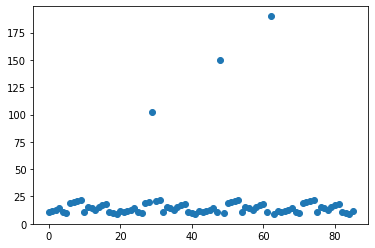

In [44]:
plt.scatter(x=range(0,86),y=data)
plt.show()

In [45]:
### Box Plot

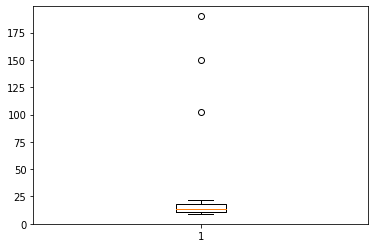

In [46]:
plt.boxplot(x=data)
plt.show()

In [47]:
### Using Z-Score
### Z = (X-X_mean)/std

In [48]:
outliers = []
def detect_outliers(x):
  threshold = 3
  mean = np.mean(x)
  std = np.std(x)
  for i in x:
    z_score = (i-mean)/std
    if np.abs(z_score) > threshold:
      outliers.append(i)
  return outliers

In [49]:
my_outlier = detect_outliers(data)
my_outlier

[102, 150, 190]

In [50]:
### Using IQR - Inter Quartile Range

In [51]:
# 1. Sort Data
data = sorted(data)
data

[9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 17,
 17,
 17,
 17,
 18,
 18,
 18,
 18,
 19,
 19,
 19,
 19,
 20,
 20,
 20,
 20,
 21,
 21,
 21,
 21,
 22,
 22,
 22,
 22,
 102,
 150,
 190]

In [52]:
### Calculate q1 and q3
q1,q3 = np.percentile(data,[25,75])
print(q1,q3)

11.0 18.0


In [53]:
### Calculate IQR
iqr = q3 - q1
iqr

7.0

In [54]:
#### Find the lower and upper bound value
lower_bound_value = q1 - (1.5 * iqr)
upper_bound_value = q3 + (1.5 * iqr)
print(lower_bound_value,upper_bound_value)

0.5 28.5


In [55]:
df = pd.DataFrame(data)
df = df.rename(columns={0:"samples"})
df.head()

,samples
0,9
1,9
2,9
3,9
4,10


In [56]:
df[df['samples']<lower_bound_value]

,samples


In [57]:
df[df['samples']>upper_bound_value]

,samples
83,102
84,150
85,190


In [58]:
#### Import the dataset
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [59]:
my_outlier = detect_outliers(data['age'])
my_outlier

[102, 150, 190, 80.0, 74.0]